Exploring Financial data

In [86]:
%matplotlib inline 
# Remove inline to get interactive plots
from pandas_datareader import data as pdr
import datetime
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

yfin.pdr_override()

start = "2020-01-1"
end = "2023-08-10"

# Get data from stocks
amzn = pd.DataFrame(pdr.get_data_yahoo("AMZN",start, end))
googl = pd.DataFrame(pdr.get_data_yahoo("GOOGL", start, end))
aapl = pd.DataFrame(pdr.get_data_yahoo("AAPL",start,end))

amzn.keys()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

C:\Users\janag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


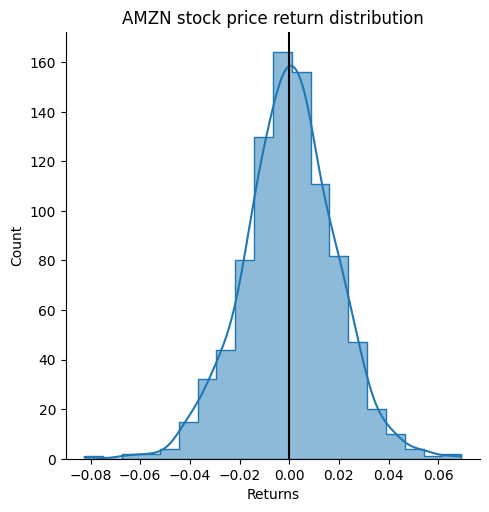

In [87]:
# Visualise data   
## Calculate Returns (R = [open_price - close_price]/open_price)

amzn['Returns'] = (amzn['Open'] - amzn['Close'])/amzn['Open']
googl['Returns'] = (googl['Open'] - googl['Close'])/googl['Open']
aapl['Returns'] = (aapl['Open'] - aapl['Close'])/aapl['Open']

sns.displot(amzn['Returns'], kde=True, bins=20, element='step')
plt.title('AMZN stock price return distribution')
plt.axvline(x=amzn['Returns'].mean(), color='k')

Text(0.5, 1.0, 'AMZN, GOOGL, and AAPL returns')

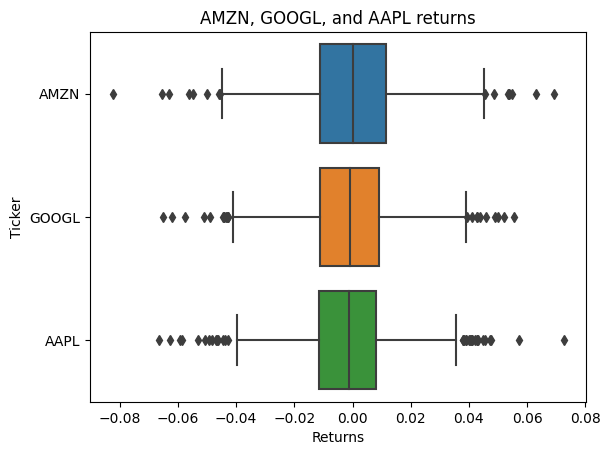

In [88]:
# Visualise mean, dispersion, and skewness in data

amzn['Ticker'] = 'AMZN'
googl['Ticker'] = 'GOOGL'
aapl['Ticker'] = 'AAPL'

stocks = pd.concat([amzn,googl,aapl])
stocks = stocks[['Ticker','Returns']]

sns.boxplot(y=stocks['Ticker'], x=stocks['Returns'])
plt.title('AMZN, GOOGL, and AAPL returns')

Boxplot Interpretation

Outliers - Outside the whiskers of the box plot (black diamonds) \
Lower whisker (low return range) - 1st quartile group i.e., lowest 25% of data (except outliers)\

Upper whisker (high return range) - 4th quartile group i.e., highest 25% of data (except outliers)\

Black line within colored box is the median. Its position is used to infer the skewness. Center - Normal dist. Left - positive skew. Right - negative skew.
The x-range of the colored box is called the Interquartile Range (IQR)

<Axes: >

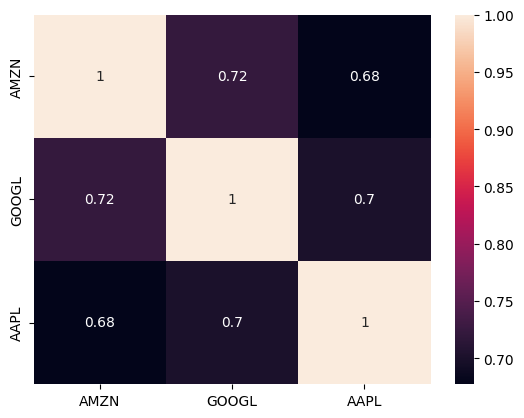

In [89]:
# Correlation heat map for returns

stocks_corr = pd.DataFrame({'AMZN':amzn['Returns'], 'GOOGL':googl['Returns'], 'AAPL':aapl['Returns']}).corr(method='pearson')
sns.heatmap(stocks_corr, annot=True)

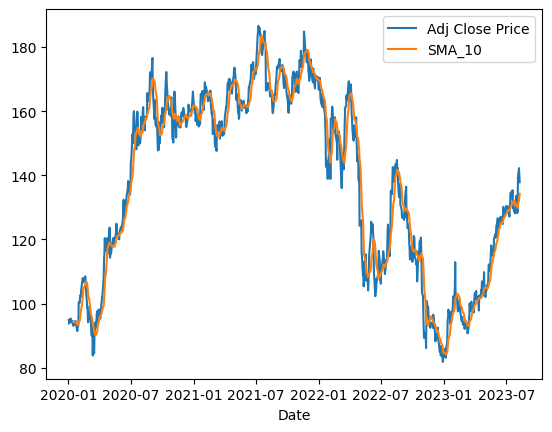

In [90]:
# Lagging Indicators

# Moving average - smooth out short-term fluctuations in stock prices to understand the trends in price direction.

amzn['SMA_10'] = amzn['Close'].rolling(window=10).mean()
googl['SMA_10'] = googl['Close'].rolling(window=10).mean()
aapl['SMA_10'] = aapl['Close'].rolling(window=10).mean()

plt.plot(amzn['Adj Close'], label='Adj Close Price')
plt.plot(amzn['SMA_10'], label='SMA_10')
plt.xlabel('Date')
plt.legend(loc='upper right')


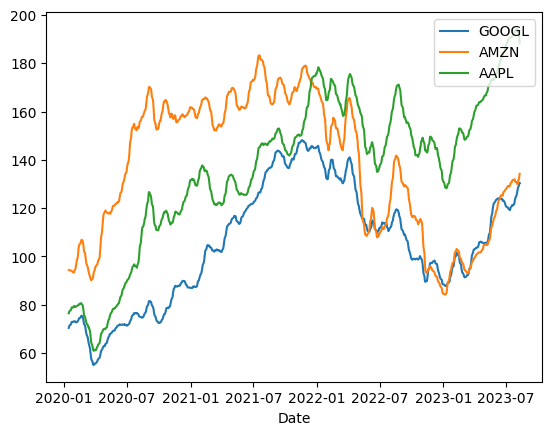

In [91]:
# Since the correlation between amzn and googl seems high, let's plot their SMA_10 plots together.

plt.plot(googl['SMA_10'], label='GOOGL')
plt.plot(amzn['SMA_10'], label='AMZN')
plt.plot(aapl['SMA_10'], label='AAPL')
plt.xlabel('Date')
plt.legend(loc='upper right')